In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Importing excel sheets as dfs, should both have samples in the same order
predictors_df = pd.read_excel('../Predictors_Cleaned.xlsx', 0)
    # Rows are samples, columns are predictors
outcomes_df = pd.read_excel('../Outcomes_Cleaned.xlsx', 0)
    # Rows are samples, columns are mechanisms

# Dropping unnecessary metadata
X = predictors_df.drop('SAMPLE NAME', axis=1)
Y = outcomes_df.drop('MECHANISM', axis=1) # Full DF must iterate through
feature_names = X.columns
gene_names = Y.columns

# List of columns for iterating
columns = list(Y)

In [9]:
# splitting the Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)
x_scaled_test = scaler.fit_transform(x_test)

# applying pca algorithm
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
x_pca_test = pca.transform(x_scaled_test)

# applying linear regression
linreg = LinearRegression()
linreg.fit(x_scaled, y_train)

# MSE
pred = linreg.predict(x_scaled_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

5846.956174982894


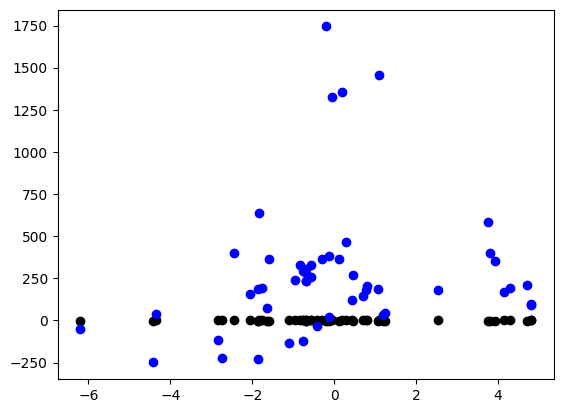

In [22]:
# Plot outputs
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], color="black")
plt.scatter(x_pca_test[:, 0], pred[:, 1], color="blue")

#plt.xticks(())
#plt.yticks(())

plt.show()

In [11]:
# DOESNT WORK
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# Making the PCR model
pcr = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression())
pcr.fit(x_train, y_train)

# Retrieving the PCA step of the pipeline
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

# print(pcr.named_steps)
# X_pca = pca.fit_transform(pcr.named_steps["standardscaler"])

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(pca.transform(x_test), y_test, label="ground truth")
axes[0].scatter(
    pca.transform(x_test), pcr.predict(x_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()